<a href="https://colab.research.google.com/github/diegofescg/TalentoTech/blob/main/TallerGeoJson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Axes: >

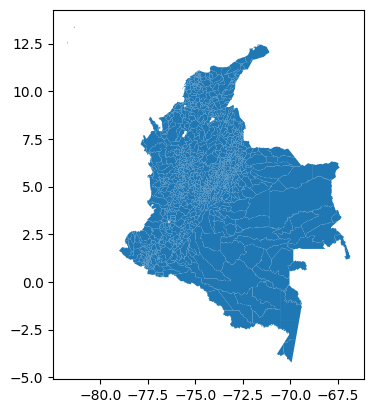

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, box, LineString
import requests

# URL pública de Google Drive para compartir
google_drive_url = "https://drive.google.com/uc?id=1rge0WctTRXHAkkdoniWlZWBzoH8v0IYn"

# Descargar el archivo
response = requests.get(google_drive_url)
with open("municipios.geojson", "wb") as f:
    f.write(response.content)

# Ruta al archivo descargado localmente
ruta_municipios = "municipios.geojson"

# Leer el archivo con GeoPandas
shapes = gpd.read_file(ruta_municipios)

# Visualizar
shapes.plot()

In [2]:
print(shapes.columns)

Index(['OBJECTID_1', 'DPTO_CCDGO', 'MPIO_CCDGO', 'Shape_Leng', 'OBJECTID',
       'MPIO_CNMBR', 'DESCRPCION', 'DEPTO', 'P_ENERSI', 'P_ENERNO',
       'P_ALCANSI', 'P_ALCANNO', 'P_ACUESI', 'P_ACUENO', 'P_GASNSI',
       'P_GASNNO', 'P_GASNNOIN', 'P_TELEFSI', 'P_TELEFNO', 'P_TELEFNOI',
       'ShapeSTArea', 'ShapeSTLength', 'geometry'],
      dtype='object')


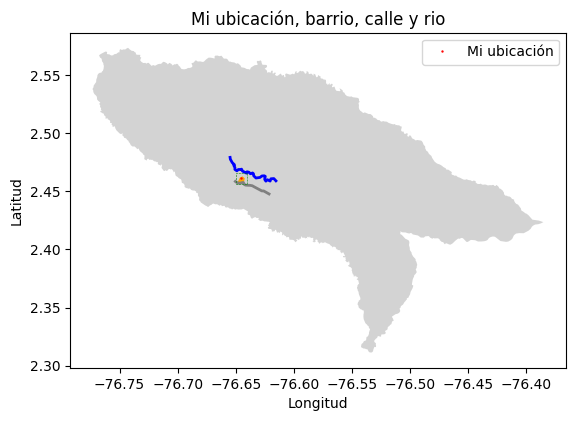

In [34]:
# Filtrando a Popayán
popayan = shapes[shapes['MPIO_CNMBR'] == 'POPAYAN']

# Coordenadas de mi casa
latitud_casa, longitud_casa = 2.461184394876284, -76.64511464861079

# Crear un punto con las coordenadas de la casa
punto_casa = Point(longitud_casa, latitud_casa)

# Coordenadas de la calle 5ta
coordenadas_calle = [
    [-76.65124707453423, 2.4593344046802486],
    [-76.64963661967438, 2.457957356276239],
    [-76.64876610353348, 2.457623965395996],
    [-76.64792460459782, 2.4569716786502624],
    [-76.64711212286676, 2.4571021360243037],
    [-76.64558871962065, 2.4572180981253524],
    [-76.64394924755553, 2.457652955910504],
    [-76.64344144647399, 2.4575804796230187],
    [-76.64264347334449, 2.4559280191946584],
    [-76.64155532816922, 2.4553916938802303],
    [-76.63975854271465, 2.455255911092962],
    [-76.63788693301215, 2.455226920526414],
    [-76.63579769427464, 2.4548645383901544],
    [-76.63414371360722, 2.453922344375556],
    [-76.62754446293361, 2.45040318008553],
    [-76.62598246583606, 2.4503900358728856],
    [-76.62029509371717, 2.447186562807701]
]

# Coordenadas del río Cauca
coordenadas_rio_cauca = [
    [-76.61460430912544, 2.45820688989987],
    [-76.61723348351994, 2.461016903871595],
    [-76.61974037073303, 2.46083364227124],
    [-76.6204129502298, 2.45887885030092],
    [-76.62279755026144, 2.4600395083789266],
    [-76.6240815656639, 2.458817763005939],
    [-76.62512100670351, 2.4604060317727345],
    [-76.62457071438816, 2.462910605598694],
    [-76.62542672465595, 2.4633993023821716],
    [-76.62744446314478, 2.4632771282029324],
    [-76.62915648368117, 2.4619942986476673],
    [-76.63258052475317, 2.461505601348861],
    [-76.63459826324197, 2.463460389467187],
    [-76.63472055042266, 2.4651097397100585],
    [-76.63551541710014, 2.465842783606746],
    [-76.6373497248172, 2.465170826717369],
    [-76.63863374021966, 2.4664536532118717],
    [-76.64028461716492, 2.4668812617684637],
    [-76.64071262229882, 2.4656595226704496],
    [-76.64419780696115, 2.4674921308966304],
    [-76.64499267363863, 2.4691414761405923],
    [-76.64597097108785, 2.4688360419909543],
    [-76.64774413521458, 2.4688360419909543],
    [-76.6490281506163, 2.467675391580457],
    [-76.65074017115188, 2.4688971288263275],
    [-76.65067902756155, 2.470424298804417],
    [-76.6516573250108, 2.4723179871374583],
    [-76.65113959912908, 2.4729288537661773],
    [-76.65297390684613, 2.474700365396444],
    [-76.6546247837914, 2.4776325173752696],
    [-76.65505278892529, 2.4804424902621065]
]

# Coordenadas de la delimitación del barrio
coordenadas_barrio = [
    [-76.6464485741731, 2.4618269696597963],
    [-76.64848630097687, 2.4576081011743014],
    [-76.64293779184771, 2.4575590444844977],
    [-76.6422749168633, 2.4612382911372634],
    [-76.64416533811553, 2.4629062129415473],
    [-76.6464485741731, 2.4618760261913906]
]

# Definir el tamaño del cuadro alrededor del punto (en grados)
tamaño_cuadro = 0.005  # Puedes ajustar este valor según sea necesario

# Crear un cuadro alrededor del punto
cuadro = box(longitud_casa - tamaño_cuadro, latitud_casa - tamaño_cuadro,
             longitud_casa + tamaño_cuadro, latitud_casa + tamaño_cuadro)

# Crear un GeoDataFrame para la calle, el río Cauca y la delimitación del barrio
linea_calle = LineString(coordenadas_calle)
linea_rio_cauca = LineString(coordenadas_rio_cauca)
poligono_barrio = Polygon(coordenadas_barrio)
gdf_calle_rio_barrio = gpd.GeoDataFrame(geometry=[linea_calle, linea_rio_cauca, poligono_barrio])

# Crear el gráfico
fig, ax = plt.subplots()

# Trazar la zona de Popayán
popayan.plot(ax=ax, color='lightgrey')

# Trazar la calle, el río Cauca y la delimitación del barrio
gdf_calle_rio_barrio.plot(ax=ax, color=['grey', 'blue', 'orange'], linewidth=2)

# Trazar el punto de la casa
ax.plot(longitud_casa, latitud_casa, 'ro', markersize=0.7, label='Mi ubicación')

# Trazar el cuadro alrededor del punto
x, y = cuadro.exterior.xy
ax.plot(x, y, color='green', linestyle='--', linewidth=0.4)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Mi ubicación, barrio, calle y rio')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

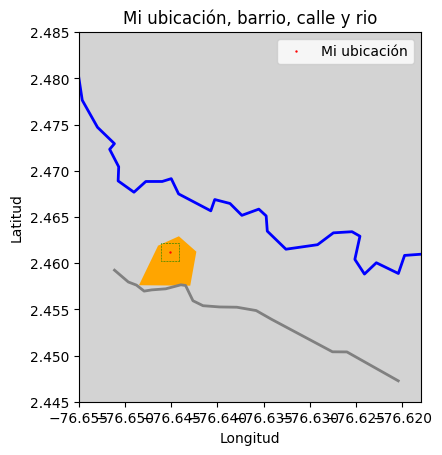

In [33]:
# Filtrando a Popayán
popayan = shapes[shapes['MPIO_CNMBR'] == 'POPAYAN']

# Coordenadas de mi casa
latitud_casa, longitud_casa = 2.461184394876284, -76.64511464861079

# Crear un punto con las coordenadas de la casa
punto_casa = Point(longitud_casa, latitud_casa)

# Coordenadas de la calle 5ta
coordenadas_calle = [
    [-76.65124707453423, 2.4593344046802486],
    [-76.64963661967438, 2.457957356276239],
    [-76.64876610353348, 2.457623965395996],
    [-76.64792460459782, 2.4569716786502624],
    [-76.64711212286676, 2.4571021360243037],
    [-76.64558871962065, 2.4572180981253524],
    [-76.64394924755553, 2.457652955910504],
    [-76.64344144647399, 2.4575804796230187],
    [-76.64264347334449, 2.4559280191946584],
    [-76.64155532816922, 2.4553916938802303],
    [-76.63975854271465, 2.455255911092962],
    [-76.63788693301215, 2.455226920526414],
    [-76.63579769427464, 2.4548645383901544],
    [-76.63414371360722, 2.453922344375556],
    [-76.62754446293361, 2.45040318008553],
    [-76.62598246583606, 2.4503900358728856],
    [-76.62029509371717, 2.447186562807701]
]

# Coordenadas del río Cauca
coordenadas_rio_cauca = [
    [-76.61460430912544, 2.45820688989987],
    [-76.61723348351994, 2.461016903871595],
    [-76.61974037073303, 2.46083364227124],
    [-76.6204129502298, 2.45887885030092],
    [-76.62279755026144, 2.4600395083789266],
    [-76.6240815656639, 2.458817763005939],
    [-76.62512100670351, 2.4604060317727345],
    [-76.62457071438816, 2.462910605598694],
    [-76.62542672465595, 2.4633993023821716],
    [-76.62744446314478, 2.4632771282029324],
    [-76.62915648368117, 2.4619942986476673],
    [-76.63258052475317, 2.461505601348861],
    [-76.63459826324197, 2.463460389467187],
    [-76.63472055042266, 2.4651097397100585],
    [-76.63551541710014, 2.465842783606746],
    [-76.6373497248172, 2.465170826717369],
    [-76.63863374021966, 2.4664536532118717],
    [-76.64028461716492, 2.4668812617684637],
    [-76.64071262229882, 2.4656595226704496],
    [-76.64419780696115, 2.4674921308966304],
    [-76.64499267363863, 2.4691414761405923],
    [-76.64597097108785, 2.4688360419909543],
    [-76.64774413521458, 2.4688360419909543],
    [-76.6490281506163, 2.467675391580457],
    [-76.65074017115188, 2.4688971288263275],
    [-76.65067902756155, 2.470424298804417],
    [-76.6516573250108, 2.4723179871374583],
    [-76.65113959912908, 2.4729288537661773],
    [-76.65297390684613, 2.474700365396444],
    [-76.6546247837914, 2.4776325173752696],
    [-76.65505278892529, 2.4804424902621065]
]

# Coordenadas de la delimitación del barrio
coordenadas_barrio = [
    [-76.6464485741731, 2.4618269696597963],
    [-76.64848630097687, 2.4576081011743014],
    [-76.64293779184771, 2.4575590444844977],
    [-76.6422749168633, 2.4612382911372634],
    [-76.64416533811553, 2.4629062129415473],
    [-76.6464485741731, 2.4618760261913906]
]

# Definir el tamaño del cuadro alrededor del punto (en grados)
tamaño_cuadro = 0.001  # Puedes ajustar este valor según sea necesario

# Crear un cuadro alrededor del punto
cuadro = box(longitud_casa - tamaño_cuadro, latitud_casa - tamaño_cuadro,
             longitud_casa + tamaño_cuadro, latitud_casa + tamaño_cuadro)

# Crear un GeoDataFrame para la calle, el río Cauca y la delimitación del barrio
linea_calle = LineString(coordenadas_calle)
linea_rio_cauca = LineString(coordenadas_rio_cauca)
poligono_barrio = Polygon(coordenadas_barrio)
gdf_calle_rio_barrio = gpd.GeoDataFrame(geometry=[linea_calle, linea_rio_cauca, poligono_barrio])

# Crear el gráfico
fig, ax = plt.subplots()

# Trazar la zona de Popayán
popayan.plot(ax=ax, color='lightgrey')

# Trazar la calle, el río Cauca y la delimitación del barrio
gdf_calle_rio_barrio.plot(ax=ax, color=['grey', 'blue', 'orange'], linewidth=2)

# Trazar el punto de la casa
ax.plot(longitud_casa, latitud_casa, 'ro', markersize=0.7, label='Mi ubicación')

# Trazar el cuadro alrededor del punto
x, y = cuadro.exterior.xy
ax.plot(x, y, color='green', linestyle='--', linewidth=0.4)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Mi ubicación, barrio, calle y rio')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Establecer los límites de los ejes para hacer zoom
ax.set_xlim([-76.655, -76.618])  # Ajusta estos valores según sea necesario
ax.set_ylim([2.445, 2.485])  # Ajusta estos valores según sea necesario

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [35]:
# Crear un objeto Point con las coordenadas de tu casa
punto_casa = Point(longitud_casa, latitud_casa)

# Agregar el punto de la casa al GeoDataFrame
gdf_calle_rio_barrio.loc[len(gdf_calle_rio_barrio)] = [punto_casa]

# Guardar el GeoDataFrame actualizado en formato GeoJSON
gdf_calle_rio_barrio.to_file("archivo_salida_con_casa.geojson", driver='GeoJSON')

# Imprimir un mensaje de confirmación
print("El archivo se ha guardado correctamente como 'archivo_salida_con_casa.geojson' con las coordenadas de tu casa incluidas.")


El archivo se ha guardado correctamente como 'archivo_salida_con_casa.geojson' con las coordenadas de tu casa incluidas.
